# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview
print(combined_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [7]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(f"The number of unique mice in the combined data is: {num_mice}")

The number of unique mice in the combined data is: 249


In [8]:
# Identify duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate rows
print(duplicates)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [10]:
# Drop duplicates based on 'Mouse ID' and 'Timepoint'
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

# Display the clean DataFrame
print(clean_data)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [12]:
# Number of unique mice in the clean DataFrame
print(clean_data['Mouse ID'].nunique())


249


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume.

summary_stats = grouped.agg([
    'mean',
    'median',
    'var',   # variance
    'std',   # standard deviation
    lambda x: x.sem()  # SEM (standard error of the mean)
])

# Assemble the resulting series into a single summary DataFrame.

summary_stats.rename(columns={'<lambda>': 'SEM'}, inplace=True)

print(summary_stats)

                   mean     median        var       std  <lambda_0>
Drug Regimen                                                       
Capomulin     40.675741  41.557809  24.947764  4.994774    0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188    0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243    0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709    0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708    0.596466
Placebo       54.033581  52.288934  61.168083  7.821003    0.581331
Propriva      52.322552  50.854632  42.351070  6.507770    0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308    0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419    0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589    0.516398


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    SEM=lambda x: x.sem()
)


print(summary_stats)

                   mean     median   variance   std_dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

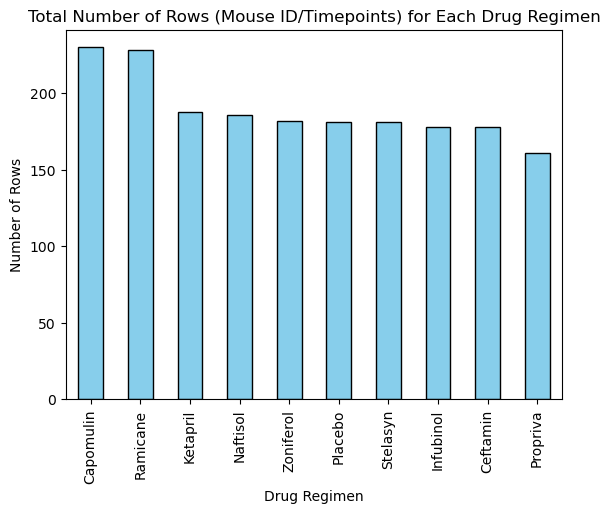

In [18]:
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
row_counts = combined_data['Drug Regimen'].value_counts()

# Generate a bar plot
row_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

# Show the plot
plt.show()

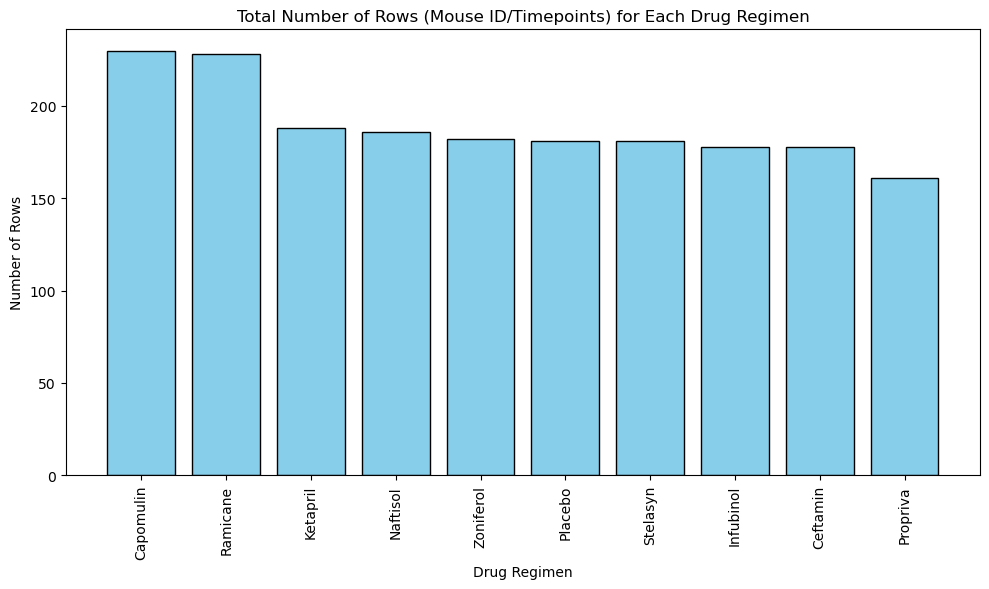

In [19]:
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
row_counts = combined_data['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(row_counts.index, row_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

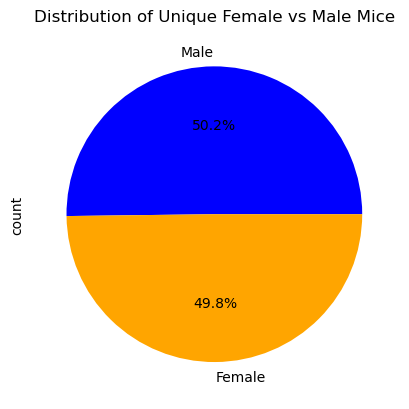

In [25]:
# Get the unique mice with their gender
unique_mice = combined_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Generate a pie chart
gender_counts.plot.pie(autopct='%1.1f%%', colors=['blue', 'orange'])

# Add title
plt.title('Distribution of Unique Female vs Male Mice')

# Show the plot
plt.ylabel
plt.show()

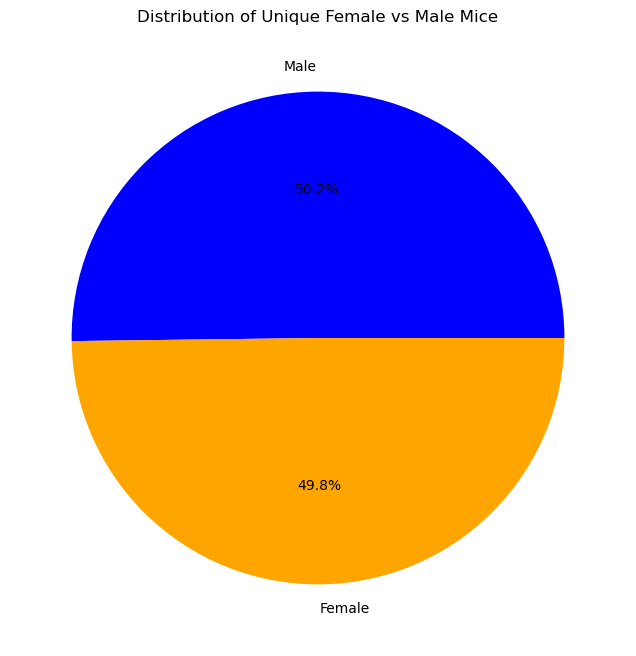

In [29]:
# Get the unique mice with their gender
unique_mice = combined_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Unique Female vs Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# List of treatment regimens to include
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
last_timepoint_df = combined_data.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()

# Merge this DataFrame with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint_df, combined_data, on=['Mouse ID', 'Timepoint'])

# Filter for the specified treatment regimens
final_tumor_volumes = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(treatment_regimens)]

# Display the results
print(final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']])

    Mouse ID Drug Regimen  Tumor Volume (mm3)  Timepoint
0       a203    Infubinol           67.973419         45
1       a251    Infubinol           65.525743         45
3       a275     Ceftamin           62.999356         45
6       a411     Ramicane           38.407618         45
7       a444     Ramicane           43.047543         45
..       ...          ...                 ...        ...
239     y769     Ceftamin           68.594745         45
240     y793    Capomulin           31.896238         45
241     y865     Ceftamin           64.729837         45
245     z578     Ramicane           30.638696         45
246     z581    Infubinol           62.754451         45

[100 rows x 4 columns]


In [32]:
# List of treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Filter the DataFrame for the current treatment regimen
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]
    
    # Append the tumor volumes to the list
    tumor_vol_data.append(treatment_data['Tumor Volume (mm3)'])
    
    # Calculate IQR
    quartiles = treatment_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    
    # Calculate bounds for potential outliers
    lower_bound = quartiles[0.25] - 1.5 * IQR
    upper_bound = quartiles[0.75] + 1.5 * IQR
    
    # Locate outliers
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) |
                              (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print outliers for each treatment in the specified format
    if not outliers.empty:
        print(f"{treatment}'s potential outliers: {outliers['Tumor Volume (mm3)'].to_list()}")
    else:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


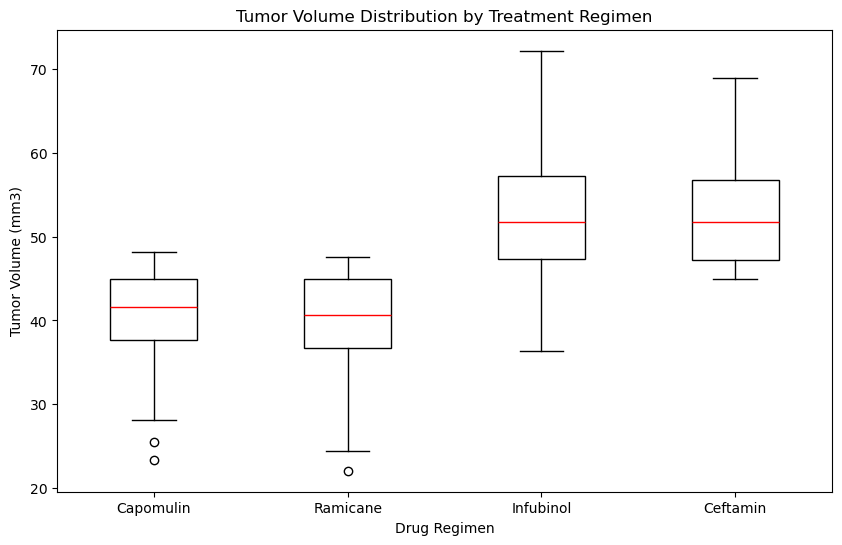

In [35]:
# Generate a box plot using Pyplot
plt.figure(figsize=(10, 6))
plt.boxplot([combined_data[combined_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments],
            labels=treatments, patch_artist=True,
            boxprops=dict(facecolor='white', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))

# Add labels and title
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots



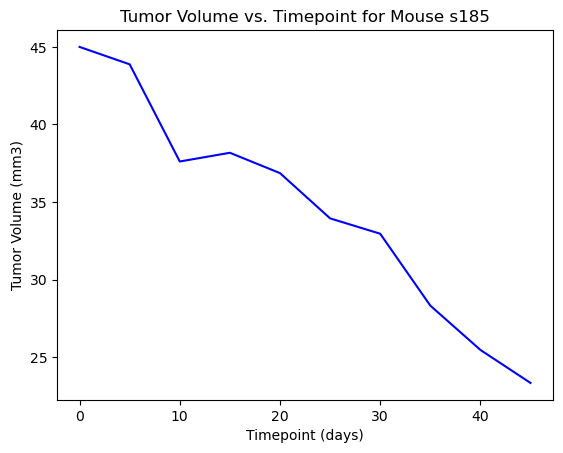

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Filter data for Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Select a single mouse (e.g., the first one)
mouse_id = capomulin_data["Mouse ID"].iloc[0]

# Filter data for the selected mouse
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Plot tumor volume vs. timepoint
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], linestyle='-', color='b')
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


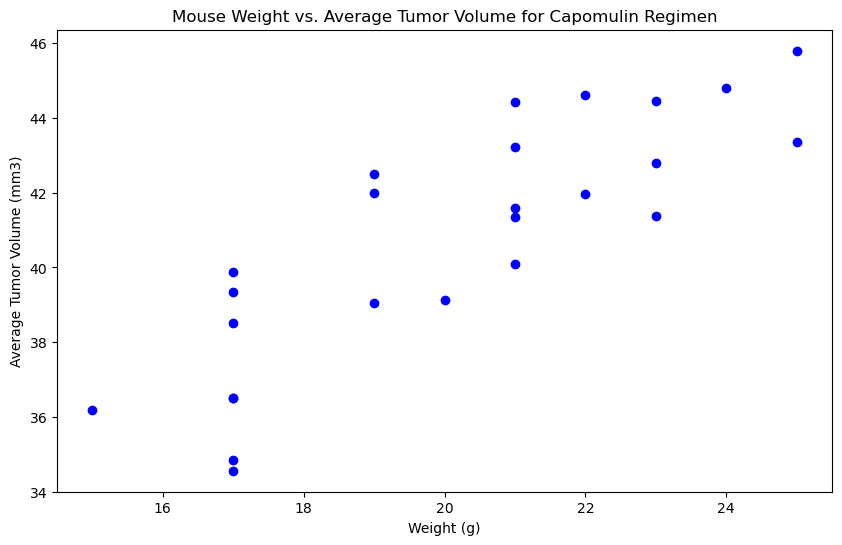

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID").agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
}).reset_index()

# Plot mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression


Correlation coefficient: 0.84


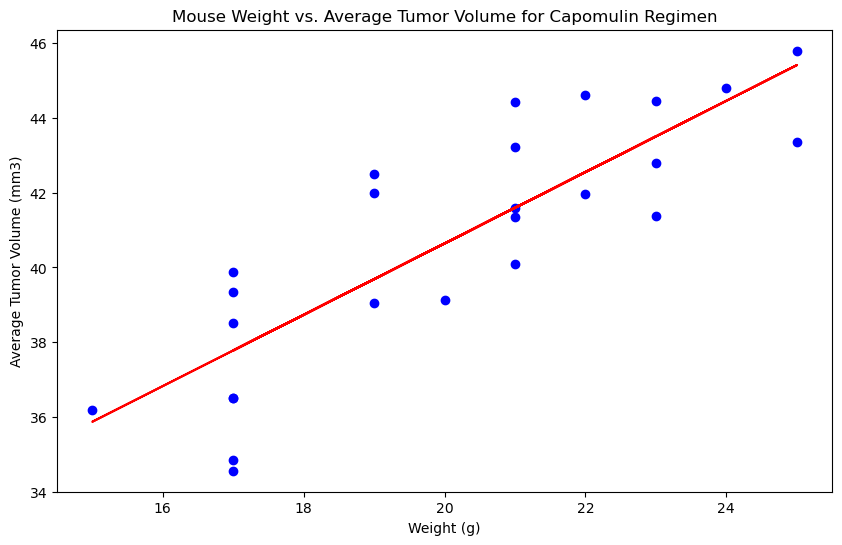

In [46]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])[0]
print(f"Correlation coefficient: {correlation_coefficient:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Generate a line of best fit
x_values = average_tumor_volume['Weight (g)']
y_values = slope * x_values + intercept

# Plot mouse weight vs. average tumor volume with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', marker='o', label='Data points')
plt.plot(x_values, y_values, color='r', linestyle='-', label=f'Fit line: y={slope:.2f}x + {intercept:.2f}')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()